In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from seaborn import *

In [48]:
data = pd.read_csv("../data/data-engineering.csv")

In [49]:
data.head()

,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,FUNIL_ONBOARDING_PIPEDRIVE_activities_count,ATENDIMENTOS_AGENDA_Faltas Todos Atendimento,ATENDIMENTOS_AGENDA_Qde Atendimento Médico,ATENDIMENTOS_AGENDA_Faltas Atendimento Médico,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,ATENDIMENTOS_AGENDA_Faltas Acolhimento,ATENDIMENTOS_AGENDA_Qde Psicoterapia,ATENDIMENTOS_AGENDA_Qde Prescrições,...,Status_open,Status_won,lost_reason_Outro.1,lost_reason_[Associade] Cancelou assinatura,lost_reason_[Onboarding] Não retornou aos contatos de resgate,lost_reason_[Onboarding] Não tem interesse em seguir nas etapas do onboarding,stage_Boas-vindas,stage_Não iniciado,stage_Primeira reunião,stage_Questionário
0,3,10,0,0,0,0,2,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
1,0,9,0,0,0,0,1,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
2,1,14,9,0,0,0,1,0,0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0,11,5,0,0,0,1,0,0,0.0,...,0,1,1,0,0,0,0,0,0,1
4,0,7,1,0,0,0,1,0,25,1.0,...,0,1,1,0,0,0,0,0,0,1


In [50]:
data.columns

Index(['PESSOA_PIPEDRIVE_notes_count',
       'PESSOA_PIPEDRIVE_done_activities_count',
       'FUNIL_ONBOARDING_PIPEDRIVE_activities_count',
       'ATENDIMENTOS_AGENDA_Faltas Todos Atendimento',
       'ATENDIMENTOS_AGENDA_Qde Atendimento Médico',
       'ATENDIMENTOS_AGENDA_Faltas Atendimento Médico',
       'ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento',
       'ATENDIMENTOS_AGENDA_Faltas Acolhimento',
       'ATENDIMENTOS_AGENDA_Qde Psicoterapia',
       'ATENDIMENTOS_AGENDA_Qde Prescrições', 'TWILIO_Mensagens Inbound',
       'TWILIO_Mensagens Outbound', 'TWILIO_Ligações Outbound',
       'PESSOA_PIPEDRIVE_age', 'PESSOA_PIPEDRIVE_has_public_health_plan',
       'PESSOA_PIPEDRIVE_tem_data_dataframe_de_termino_de_contrato',
       'PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência',
       'PESSOA_PIPEDRIVE_has_notes', 'WHOQOL_Físico_New',
       'WHOQOL_Psicológico_New', 'WHOQOL_Social_New', 'WHOQOL_Ambiental_New',
       'COMUNICARE_Problemas Abertos Bool',
       'TWILIO_Data Última

### Criando gráficos para mostars relações com o churn

### Mapa de Calor com Seaborn: Este gráfico mostrará a correlação entre diferentes métricas e o status de churn.

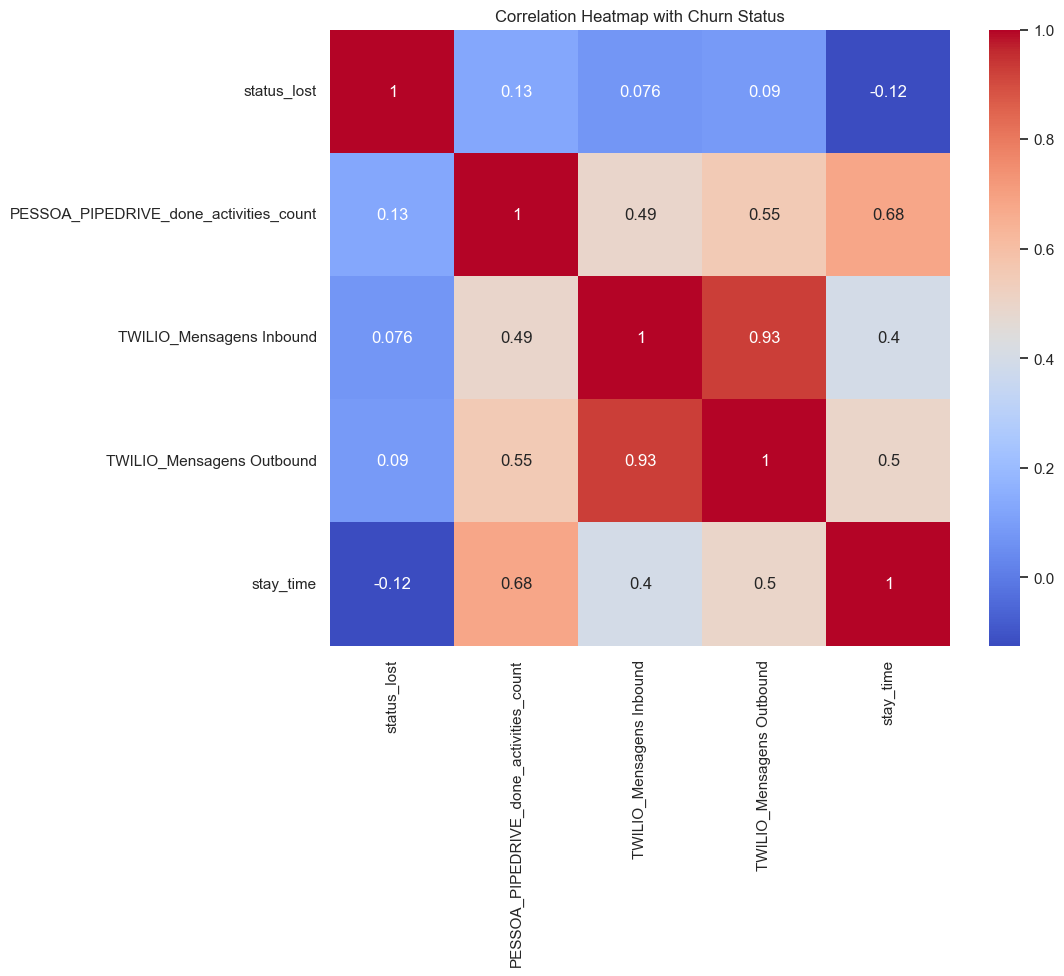

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Selecionar um subconjunto de colunas que podem ser relevantes para análise de correlação
correlation_data = data[['status_lost', 'PESSOA_PIPEDRIVE_done_activities_count', 'TWILIO_Mensagens Inbound', 'TWILIO_Mensagens Outbound', 'stay_time']]
correlation_matrix = correlation_data.corr()

# Criar e exibir o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Churn Status')
plt.yticks(rotation=0)
plt.show()


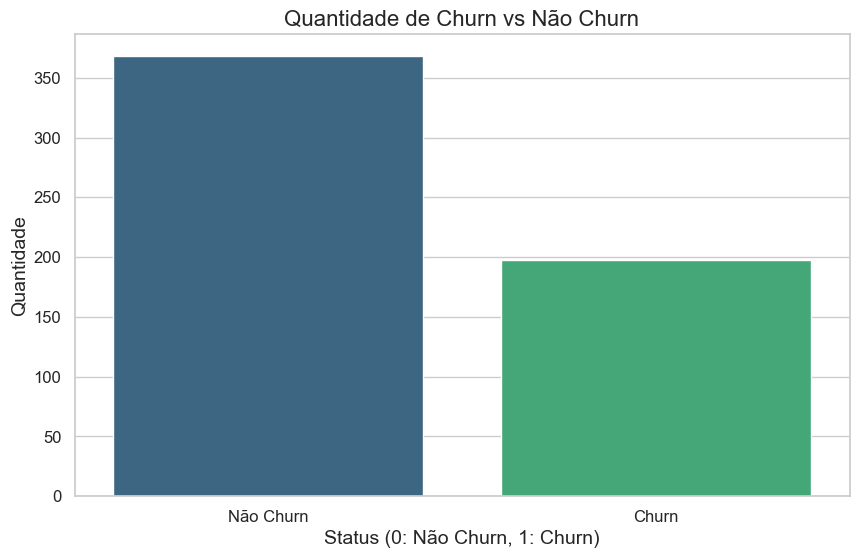

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Supondo que 'status_lost' indica churn (1 para churn, 0 para não churn)
churn_counts = data['status_lost'].value_counts()

# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Criar gráfico de barras estilizado
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title('Quantidade de Churn vs Não Churn', fontsize=16)
plt.xlabel('Status (0: Não Churn, 1: Churn)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks([0, 1], ['Não Churn', 'Churn'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:254: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



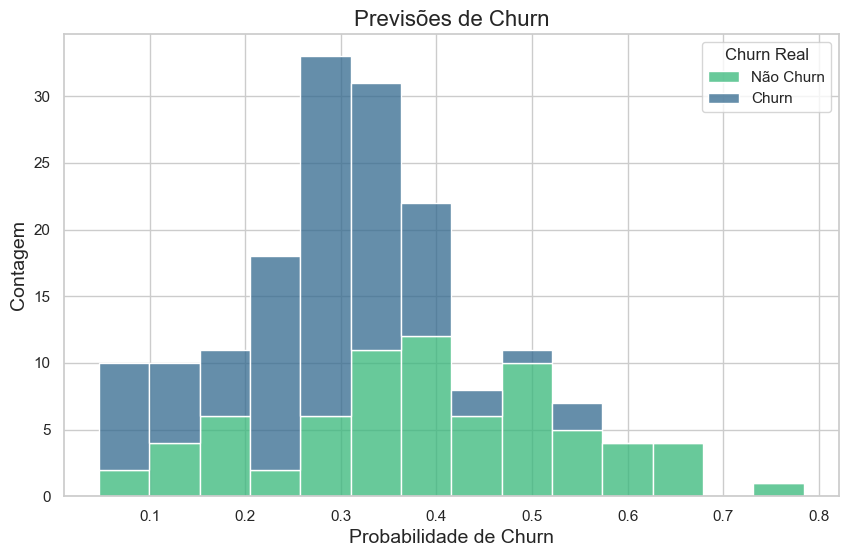

              precision    recall  f1-score   support

           0       0.63      0.98      0.77        97
           1       0.90      0.25      0.39        73

    accuracy                           0.66       170
   macro avg       0.77      0.61      0.58       170
weighted avg       0.75      0.66      0.61       170



In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Tratar possíveis valores nulos nas colunas selecionadas
features = ['PESSOA_PIPEDRIVE_done_activities_count', 'TWILIO_Mensagens Inbound', 'TWILIO_Mensagens Outbound', 'stay_time']
data[features] = data[features].fillna(0)  # Substituir NaN por 0 ou outro valor adequado

# Selecionar algumas características para o modelo
X = data[features]
y = data['status_lost']  # assumindo que 'status_lost' é a coluna de churn

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Criar um DataFrame para as previsões
predictions_df = pd.DataFrame({'Churn_Real': y_test, 'Probabilidade_Churn': y_pred_prob})

# Criar gráfico de barras com legenda
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df, x='Probabilidade_Churn', hue='Churn_Real', multiple='stack', palette='viridis')
plt.title('Previsões de Churn', fontsize=16)
plt.xlabel('Probabilidade de Churn', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn Real', labels=['Não Churn', 'Churn'])
plt.show()

print(classification_report(y_test, y_pred))

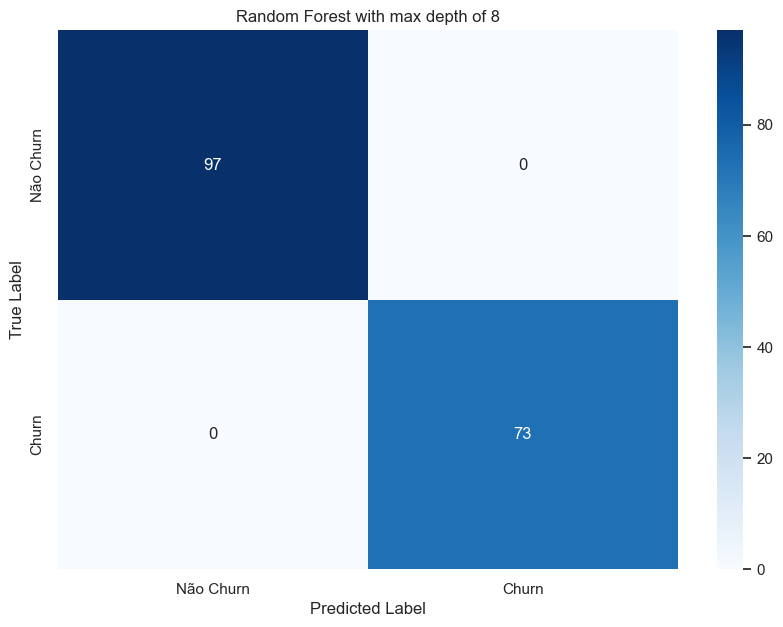

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar características e a variável alvo
# Substitua 'features' pelas colunas relevantes do seu conjunto de dados
features = data.columns.difference(['status_lost'])
X = data[features]
y = data['status_lost']  # Assumindo que esta é a coluna de churn

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de floresta aleatória
rf = RandomForestClassifier(max_depth=8, random_state=42)
rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Criar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest with max depth of 8')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# legende o gráfico
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks + 0.5, ['Não Churn', 'Churn'])
plt.yticks(tick_marks + 0.5, ['Não Churn', 'Churn'])
plt.show()
